<a href="https://colab.research.google.com/github/JulioDuarteE/Simulacion/blob/main/Unidad%203/Problema_3__Distribuci%C3%B3n_LogNormal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unidad 3
##Problema 3: Distribución LogNormal
###Maestro: Jose Gabriel Rodriguez Rivas
###Alumno: Duarte Espinoza Jose Julio

Estadísticas de los tiempos de espera:
Media muestral: 10.18 minutos
Desviación estándar muestral: 1.58 minutos
Tiempo mínimo: 6.56 minutos
Tiempo máximo: 12.89 minutos
Tiempo total de espera acumulado: 508.97 minutos


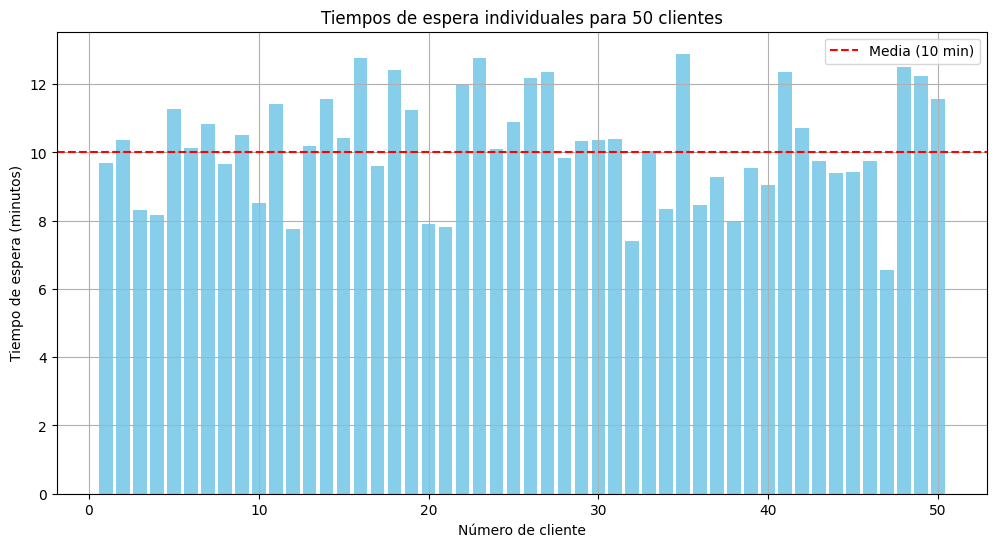

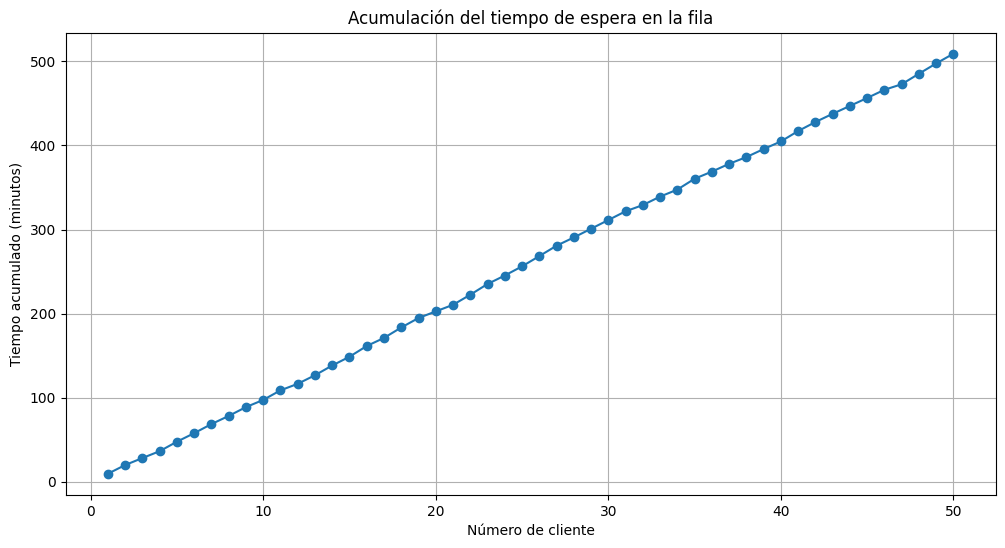

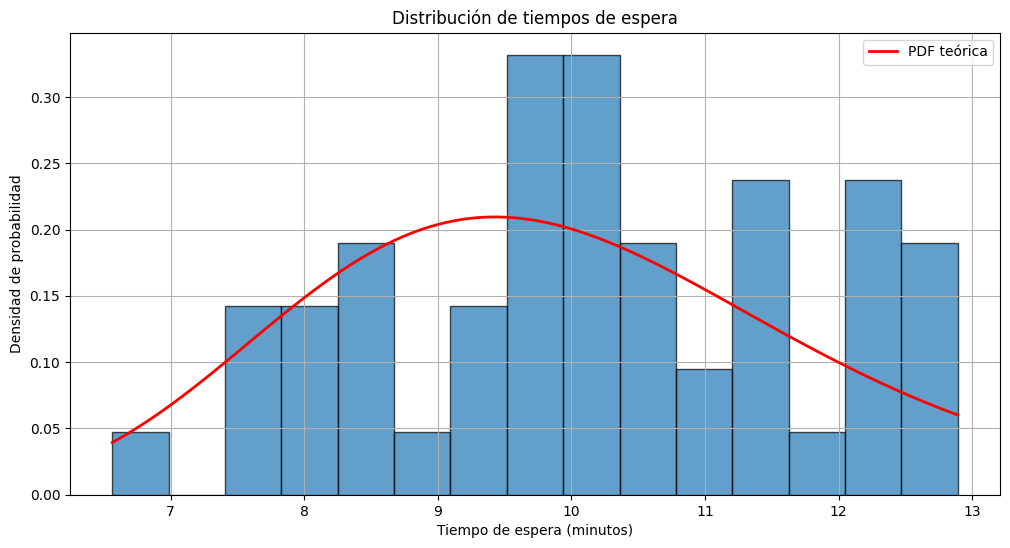

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Parámetros dados
media = 10  # minutos
desviacion = 2  # minutos
num_clientes = 50

# Convertir parámetros normales a parámetros de la lognormal
# Las fórmulas para convertir media y varianza de la distribución normal subyacente
varianza = desviacion**2
sigma = np.sqrt(np.log(1 + varianza/media**2))
mu = np.log(media) - sigma**2/2

# Generar tiempos de espera
tiempos_espera = np.random.lognormal(mean=mu, sigma=sigma, size=num_clientes)

# Calcular tiempo acumulado para cada cliente (simulación de la fila)
tiempo_acumulado = np.cumsum(tiempos_espera)

# Resultados
print("Estadísticas de los tiempos de espera:")
print(f"Media muestral: {np.mean(tiempos_espera):.2f} minutos")
print(f"Desviación estándar muestral: {np.std(tiempos_espera):.2f} minutos")
print(f"Tiempo mínimo: {np.min(tiempos_espera):.2f} minutos")
print(f"Tiempo máximo: {np.max(tiempos_espera):.2f} minutos")
print(f"Tiempo total de espera acumulado: {tiempo_acumulado[-1]:.2f} minutos")

# Gráfico de los tiempos de espera individuales
plt.figure(figsize=(12, 6))
plt.bar(range(1, num_clientes+1), tiempos_espera, color='skyblue')
plt.title('Tiempos de espera individuales para 50 clientes')
plt.xlabel('Número de cliente')
plt.ylabel('Tiempo de espera (minutos)')
plt.axhline(y=media, color='r', linestyle='--', label='Media (10 min)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de la acumulación de la fila
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_clientes+1), tiempo_acumulado, 'o-')
plt.title('Acumulación del tiempo de espera en la fila')
plt.xlabel('Número de cliente')
plt.ylabel('Tiempo acumulado (minutos)')
plt.grid(True)
plt.show()

# Histograma de la distribución
plt.figure(figsize=(12, 6))
plt.hist(tiempos_espera, bins=15, edgecolor='black', density=True, alpha=0.7)

# Superponer la PDF teórica
x = np.linspace(min(tiempos_espera), max(tiempos_espera), 100)
pdf = lognorm.pdf(x, s=sigma, scale=np.exp(mu))
plt.plot(x, pdf, 'r-', lw=2, label='PDF teórica')

plt.title('Distribución de tiempos de espera')
plt.xlabel('Tiempo de espera (minutos)')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()